# Bayesian inference of model parameters (binomial model)

The goal is to find the posterior probability distribution function (PDF) of the model parameters $ \theta $ given the observed data $ D $ and a chosen model class $ M $:

$ p(\theta | D, M) = \frac{p(D | \theta, M) p(\theta | M)}{p(D | M)} $ (1.19)

Where:
*   $ p(\theta | D, M) $: **Posterior PDF** - Our updated belief about $ \theta $ after seeing the data $ D $, assuming model $ M $.
*   $ p(D | \theta, M) $: **Likelihood Function** - The probability (or density) of observing data $ D $ given specific parameters $ \theta $ and model $ M $.
*   $ p(\theta | M) $: **Prior PDF** - Our initial belief about $ \theta $ before seeing data $ D $, assuming model $ M $.
*   $ p(D | M) $: **Evidence (or Marginal Likelihood)** - The probability (or density) of observing data $ D $ under model $ M $, averaged over all possible $ \theta $. It acts as a normalization constant.

**Concrete Example: Estimating Coin Bias**

Let's use a simple example: estimating the bias $ \theta $ (probability of heads) of a coin based on observed flips.

*   **Model $ M $**: The Binomial/Bernoulli model. We assume the coin flips are independent Bernoulli trials with a fixed (but unknown) probability of heads $ \theta $.
*   **Parameters $ \theta $**: A single parameter, $ \theta \in [0, 1] $, representing the probability of getting heads.
*   **Data $ D $**: A sequence of coin flips. Let's say we flipped the coin $ n=10 $ times and observed $ k=7 $ heads. So, $ D = \{n=10, k=7\} $.

Now let's provide Python examples for each term.


--- 1. Prior PDF p(θ|M) ---


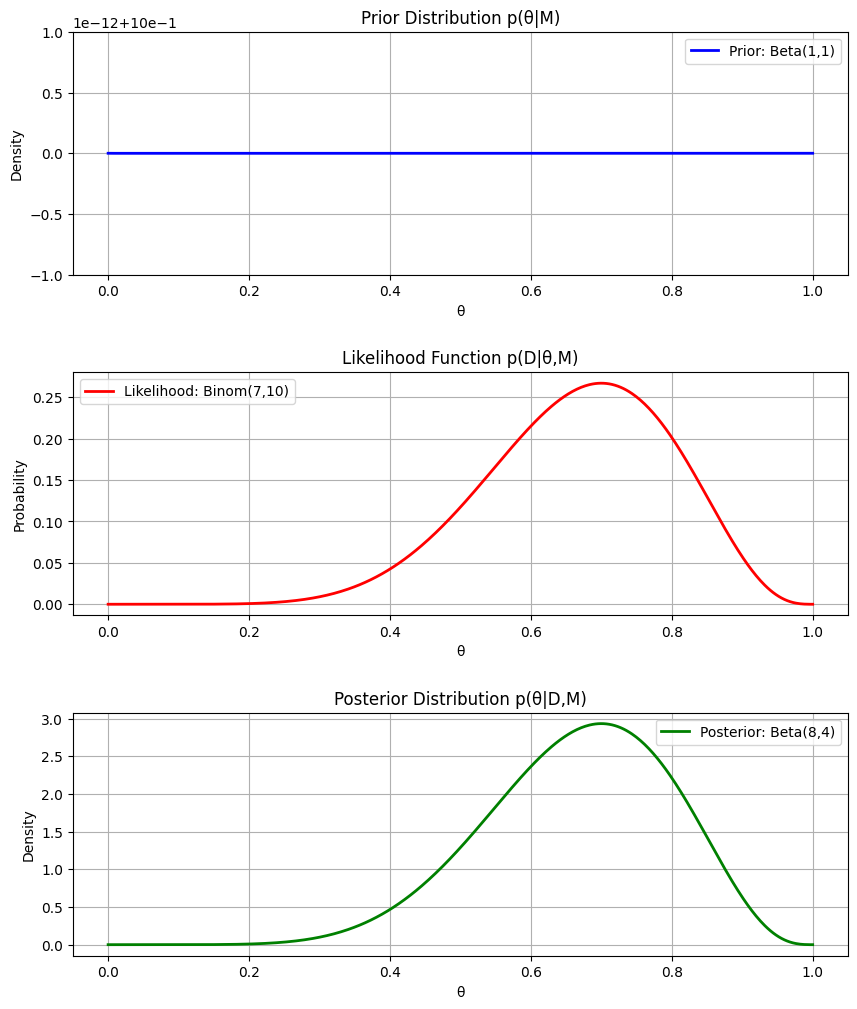

In [5]:
import numpy as np
from scipy.stats import beta, binom
from scipy.special import beta as beta_function # The Beta function B(a,b)
import matplotlib.pyplot as plt


# --- Example Setup ---
# Data D: Number of trials (n) and number of successes/heads (k)
n_trials = 10
n_heads = 7
data_D = {'n': n_trials, 'k': n_heads}

# A specific parameter value we might evaluate things at
theta_example = 0.6
# A range of theta values for potential plotting or integration
theta_range = np.linspace(0, 1, 500)

# --- Model M implicitly assumes Bernoulli trials ---
# Model M is represented here by the choice of prior and likelihood functions

# --- Term 1: Prior PDF p(θ|M) ---
print("--- 1. Prior PDF p(θ|M) ---")

# Set up the plot parameters
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
plt.subplots_adjust(hspace=0.4)

# 1. Plot Prior (using Beta(1,1) which is uniform)
prior = beta.pdf(theta_range, a=1, b=1)
axes[0].plot(theta_range, prior, 'b-', lw=2, label='Prior: Beta(1,1)')
axes[0].set_title('Prior Distribution p(θ|M)')
axes[0].set_xlabel('θ')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

# 2. Plot Likelihood
likelihood = binom.pmf(data_D['k'], data_D['n'], theta_range)
axes[1].plot(theta_range, likelihood, 'r-', lw=2, label=f'Likelihood: Binom({data_D["k"]},{data_D["n"]})')
axes[1].set_title('Likelihood Function p(D|θ,M)')
axes[1].set_xlabel('θ')
axes[1].set_ylabel('Probability')
axes[1].legend()
axes[1].grid(True)

# 3. Plot Posterior (using Beta(k+1,n-k+1))
posterior = beta.pdf(theta_range, a=data_D['k']+1, b=data_D['n']-data_D['k']+1)
axes[2].plot(theta_range, posterior, 'g-', lw=2, label=f'Posterior: Beta({data_D["k"]+1},{data_D["n"]-data_D["k"]+1})')
axes[2].set_title('Posterior Distribution p(θ|D,M)')
axes[2].set_xlabel('θ')
axes[2].set_ylabel('Density')
axes[2].legend()
axes[2].grid(True)

plt.show()

In [6]:
# --- Term 2: Likelihood p(D|θ,M) ---
# print("--- 2. Likelihood p(D|θ,M) ---")

## 1. Prior PDF: $ p(\theta | M) $

This represents our belief about the coin's bias $ \theta $ *before* we see any flips. A common choice is a Beta distribution, $ \text{Beta}(\alpha, \beta) $, because it's defined on $ [0, 1] $ and is the conjugate prior for the Binomial likelihood. Let's choose a relatively uninformative prior, like $ \text{Beta}(1, 1) $, which is equivalent to a Uniform distribution on $ [0, 1] $.

*   **Meaning**: Initially, we believe all values of $ \theta $ between 0 and 1 are equally likely.
*   **Mathematical Form**: $ p(\theta | M) = \text{Beta}(\theta | \alpha_0, \beta_0) $. Here, $ \alpha_0 = 1, \beta_0 = 1 $.
    $ p(\theta | M) = \frac{\Gamma(\alpha_0 + \beta_0)}{\Gamma(\alpha_0)\Gamma(\beta_0)} \theta^{\alpha_0-1} (1-\theta)^{\beta_0-1} = 1 $ for $ \theta \in [0, 1] $.

Prior parameters (α₀, β₀): (1, 1)
Prior PDF p(θ=0.6|M): 1.0000


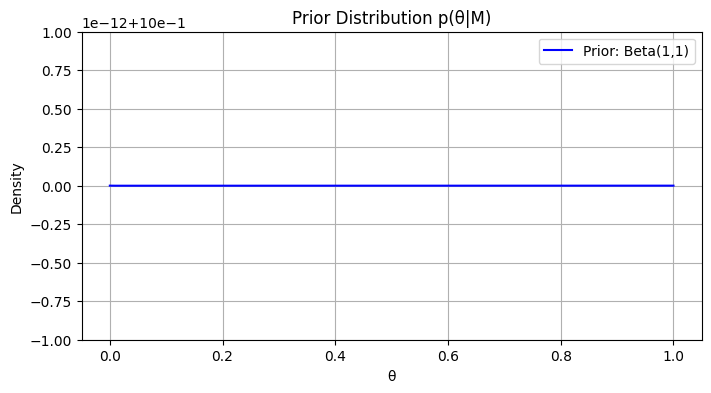

In [15]:
# Prior hyperparameters (alpha_0, beta_0)
alpha_prior = 1
beta_prior = 1

# Function to calculate prior PDF value(s)
def prior_pdf(theta, alpha, beta_):
    """Calculates the Beta PDF for given theta."""
    return beta.pdf(theta, alpha, beta_)

# Calculate prior density at theta_example
prior_at_theta_example = prior_pdf(theta_example, alpha_prior, beta_prior)

print(f"Prior parameters (α₀, β₀): ({alpha_prior}, {beta_prior})")
print(f"Prior PDF p(θ={theta_example}|M): {prior_at_theta_example:.4f}")
# For the Uniform Beta(1,1) prior, the PDF is 1 everywhere in (0,1)
# Note: Scipy might give slightly different values at the boundaries 0 or 1.

# Calculate prior over a range (useful for plotting)
prior_values = prior_pdf(theta_range, alpha_prior, beta_prior)

# Plot the prior
plt.figure(figsize=(8, 4))
plt.plot(theta_range, prior_values, label=f'Prior: Beta({alpha_prior},{beta_prior})', color='blue')
plt.title('Prior Distribution p(θ|M)')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

## 2. Likelihood Function: $ p(D | \theta, M) $

This represents the probability of observing our specific data ($ k=7 $ heads in $ n=10 $ flips) given a *particular* value of the coin's bias $ \theta $. For a fixed $ D $, we view this as a function of $ \theta $. The standard function here is the Binomial probability mass function (PMF).

*   **Meaning**: How well does a specific hypothesis $ \theta $ explain the observed data $ D $?
*   **Mathematical Form**: $ p(D | \theta, M) = \binom{n}{k} \theta^k (1-\theta)^{n-k} $


--- 2. Likelihood Function p(D|θ,M) ---
Data D: n=10, k=7
Likelihood p(D|θ=0.6, M): 0.2150


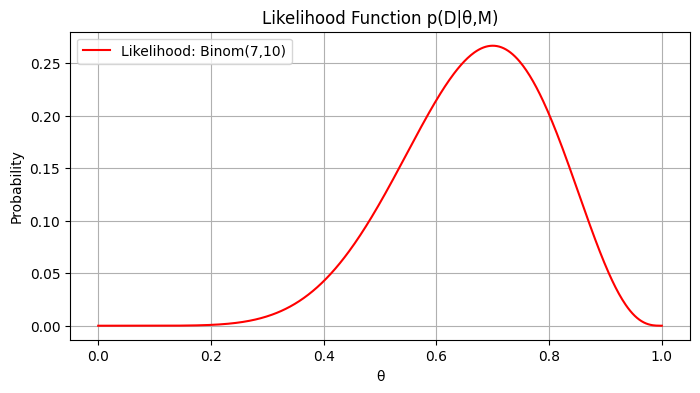

In [19]:
print("\n--- 2. Likelihood Function p(D|θ,M) ---")

# Function to calculate likelihood value(s)
def likelihood_func(data, theta):
  """Calculates the Binomial likelihood P(data|theta)."""
  n = data['n']
  k = data['k']
  # Using scipy's binom.pmf is numerically stable
  # Note: For visualization or optimization, we often only need the part
  # proportional to theta^k * (1-theta)^(n-k), but here we calculate
  # the actual probability mass.
  return binom.pmf(k, n, theta)

# Calculate likelihood at theta_example
likelihood_at_theta_example = likelihood_func(data_D, theta_example)

print(f"Data D: n={data_D['n']}, k={data_D['k']}")
print(f"Likelihood p(D|θ={theta_example}, M): {likelihood_at_theta_example:.4f}")

# Calculate likelihood over a range (useful for plotting)
likelihood_values = likelihood_func(data_D, theta_range)

# 2. Plot Likelihood
plt.figure(figsize=(8, 4))
plt.plot(theta_range, likelihood_values, label=f'Likelihood: Binom({data_D["k"]},{data_D["n"]})', color='red')
plt.title('Likelihood Function p(D|θ,M)')
plt.xlabel('θ')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

## 3. Evidence (Marginal Likelihood): $ p(D | M) $

This is the probability of observing the data $ D $ under model $ M $, integrated over all possible parameter values $ \theta $. It acts as the normalization constant in Bayes' theorem.

*   **Meaning**: Overall, how likely was the observed data under this model $ M $, considering all possibilities for $ \theta $ weighted by the prior?
*   **Mathematical Form**: $ p(D | M) = \int_0^1 p(D | \theta, M) p(\theta | M) d\theta $

For the Beta-Binomial case (Beta prior, Binomial likelihood), this integral has a closed-form solution related to the Beta function $ B(\cdot, \cdot) $:
$ p(D | M) = \binom{n}{k} \frac{B(k + \alpha_0, n - k + \beta_0)}{B(\alpha_0, \beta_0)} $
where $ B(x, y) = \frac{\Gamma(x)\Gamma(y)}{\Gamma(x+y)} $.

In [22]:
print("\n--- 3. Evidence p(D|M) ---")

# Function to calculate evidence (using the analytical solution for Beta-Binomial)
def evidence(data, alpha_pr, beta_pr):
  """Calculates the marginal likelihood p(D|M)."""
  n = data['n']
  k = data['k']
  
  # Calculate the combinatorial term C(n, k)
  # Using log-gamma functions for numerical stability is often preferred for large n, k
  # but scipy.special.binom is fine here.
  from scipy.special import binom as combinations
  comb_term = combinations(n, k)
  
  # Calculate using Beta function B(x,y)
  numerator_beta = beta_function(k + alpha_pr, n - k + beta_pr)
  denominator_beta = beta_function(alpha_pr, beta_pr)
  
  # Avoid division by zero if denominator is zero (can happen for certain priors)
  if denominator_beta == 0:
      # This case needs careful handling, maybe indicative of an improper prior 
      # or extreme data. For Beta(1,1) this won't happen.
      # Using numerical integration as an alternative:
      from scipy.integrate import quad
      integrand = lambda t: likelihood_func(data, t) * prior_pdf(t, alpha_pr, beta_pr)
      result, _ = quad(integrand, 0, 1)
      return result

  evidence_val = comb_term * (numerator_beta / denominator_beta)
  return evidence_val

# Calculate the evidence
evidence_value = evidence(data_D, alpha_prior, beta_prior)

print(f"Evidence p(D|M): {evidence_value:.4f}")

# Alternative: Numerical Integration (should give the same result)
from scipy.integrate import quad
integrand = lambda t: likelihood_func(data_D, t) * prior_pdf(t, alpha_prior, beta_prior)
evidence_numerical, _ = quad(integrand, 0, 1)
print(f"Evidence p(D|M) (numerical): {evidence_numerical:.4f}")

# Note: The evidence is a single number, not a function of theta.


--- 3. Evidence p(D|M) ---
Evidence p(D|M): 0.0909
Evidence p(D|M) (numerical): 0.0909



--- 3. Evidence p(D|M) ---
Evidence p(D|M): 0.0909
Evidence p(D|M) (numerical): 0.0909


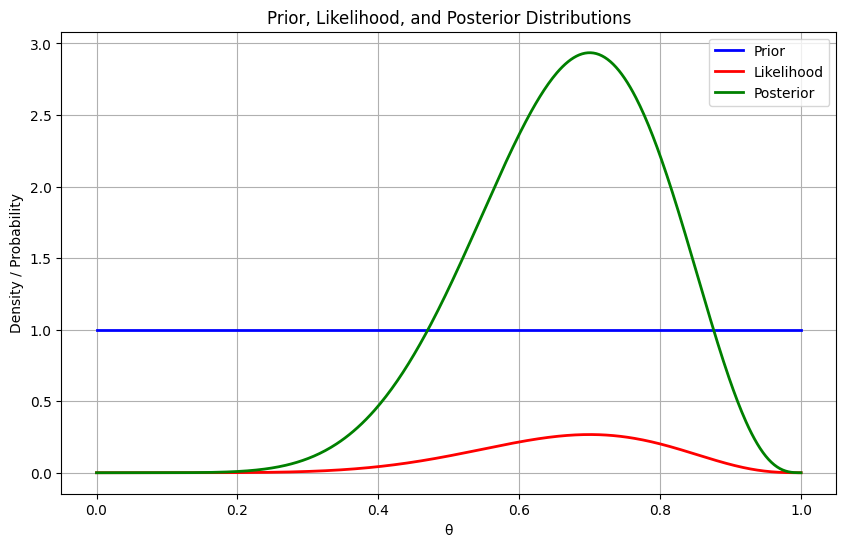

In [21]:
print("\n--- 3. Evidence p(D|M) ---")

# Function to calculate evidence (using the analytical solution for Beta-Binomial)
def evidence(data, alpha_pr, beta_pr):
    """Calculates the marginal likelihood p(D|M)."""
    n = data['n']
    k = data['k']
    from scipy.special import binom as combinations
    comb_term = combinations(n, k)
    numerator_beta = beta_function(k + alpha_pr, n - k + beta_pr)
    denominator_beta = beta_function(alpha_pr, beta_pr)
    if denominator_beta == 0:
        from scipy.integrate import quad
        integrand = lambda t: likelihood_func(data, t) * prior_pdf(t, alpha_pr, beta_pr)
        result, _ = quad(integrand, 0, 1)
        return result
    evidence_val = comb_term * (numerator_beta / denominator_beta)
    return evidence_val

# Calculate the evidence
evidence_value = evidence(data_D, alpha_prior, beta_prior)
print(f"Evidence p(D|M): {evidence_value:.4f}")

# Alternative: Numerical Integration (should give the same result)
from scipy.integrate import quad
integrand = lambda t: likelihood_func(data_D, t) * prior_pdf(t, alpha_prior, beta_prior)
evidence_numerical, _ = quad(integrand, 0, 1)
print(f"Evidence p(D|M) (numerical): {evidence_numerical:.4f}")

# Plot prior, likelihood, and posterior together
plt.figure(figsize=(10, 6))
plt.plot(theta_range, prior, label='Prior', color='blue', lw=2)
plt.plot(theta_range, binom.pmf(n_heads, n_trials, theta_range), label='Likelihood', color='red', lw=2)
plt.plot(theta_range, posterior, label='Posterior', color='green', lw=2)
plt.title('Prior, Likelihood, and Posterior Distributions')
plt.xlabel('θ')
plt.ylabel('Density / Probability')
plt.legend()
plt.grid(True)
plt.show()


## 4. Posterior PDF: $ p(\theta | D, M) $

This is our updated belief about $ \theta $ after considering the data $ D $. It's obtained by combining the prior and the likelihood using Bayes' theorem.

*   **Meaning**: Given the observed flips, what is the probability distribution for the coin's bias $ \theta $?
*   **Mathematical Form**: $ p(\theta | D, M) = \frac{p(D | \theta, M) p(\theta | M)}{p(D | M)} $

For the Beta-Binomial case, the posterior distribution is also a Beta distribution:
$ p(\theta | D, M) = \text{Beta}(\theta | k + \alpha_0, n - k + \beta_0) $
Let $ \alpha_n = k + \alpha_0 $ and $ \beta_n = n - k + \beta_0 $.
$ p(\theta | D, M) = \frac{\Gamma(\alpha_n + \beta_n)}{\Gamma(\alpha_n)\Gamma(\beta_n)} \theta^{\alpha_n-1} (1-\theta)^{\beta_n-1} $

In [ ]:
print("\n--- 4. Posterior PDF p(θ|D,M) ---")

# Posterior hyperparameters (alpha_n, beta_n)
alpha_posterior = n_heads + alpha_prior
beta_posterior = (n_trials - n_heads) + beta_prior

# Function to calculate posterior PDF value(s)
def posterior_pdf(theta, alpha_post, beta_post):
  """Calculates the posterior Beta PDF."""
  return beta.pdf(theta, alpha_post, beta_post)

# Calculate posterior density at theta_example
posterior_at_theta_example = posterior_pdf(theta_example, alpha_posterior, beta_posterior)

print(f"Posterior parameters (αₙ, βₙ): ({alpha_posterior}, {beta_posterior})")
print(f"Posterior PDF p(θ={theta_example}|D, M): {posterior_at_theta_example:.4f}")

# Calculate posterior over a range (useful for plotting)
posterior_values = posterior_pdf(theta_range, alpha_posterior, beta_posterior)

# --- Verification: Check Bayes' Theorem calculation ---
# Posterior = (Likelihood * Prior) / Evidence
numerator_at_theta_example = likelihood_at_theta_example * prior_at_theta_example
posterior_calculated = numerator_at_theta_example / evidence_value

print(f"\n--- Verification ---")
print(f"Likelihood * Prior at θ={theta_example}: {numerator_at_theta_example:.4e}")
print(f"Evidence: {evidence_value:.4e}")
print(f"Posterior p(θ={theta_example}|D,M) calculated via Bayes' Thm: {posterior_calculated:.4f}")
print(f"Posterior p(θ={theta_example}|D,M) from Beta({alpha_posterior},{beta_posterior}) PDF: {posterior_at_theta_example:.4f}")
# These two values should be very close (any difference due to floating point precision)


--- 4. Posterior PDF p(θ|D,M) ---
Posterior parameters (αₙ, βₙ): (8, 4)
Posterior PDF p(θ=0.6|D, M): 2.3649

--- Verification ---
Likelihood * Prior at θ=0.6: 2.1499e-01
Evidence: 9.0909e-02
Posterior p(θ=0.6|D,M) calculated via Bayes' Thm: 2.3649
Posterior p(θ=0.6|D,M) from Beta(8,4) PDF: 2.3649


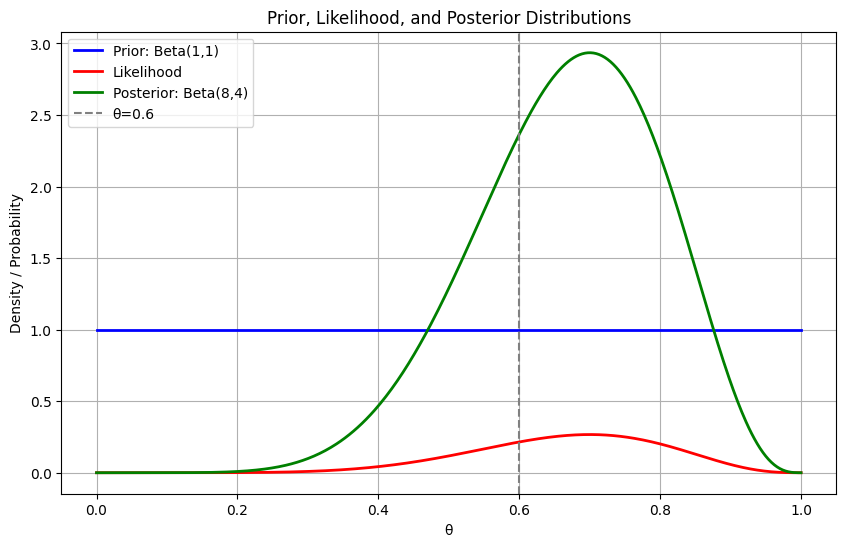

In [24]:
print("\n--- 4. Posterior PDF p(θ|D,M) ---")

# Posterior hyperparameters (alpha_n, beta_n)
alpha_posterior = n_heads + alpha_prior
beta_posterior = (n_trials - n_heads) + beta_prior

# Function to calculate posterior PDF value(s)
def posterior_pdf(theta, alpha_post, beta_post):
    """Calculates the posterior Beta PDF."""
    return beta.pdf(theta, alpha_post, beta_post)

# Calculate posterior density at theta_example
posterior_at_theta_example = posterior_pdf(theta_example, alpha_posterior, beta_posterior)

print(f"Posterior parameters (αₙ, βₙ): ({alpha_posterior}, {beta_posterior})")
print(f"Posterior PDF p(θ={theta_example}|D, M): {posterior_at_theta_example:.4f}")

# Calculate posterior over a range (useful for plotting)
posterior_values = posterior_pdf(theta_range, alpha_posterior, beta_posterior)

# --- Verification: Check Bayes' Theorem calculation ---
# Posterior = (Likelihood * Prior) / Evidence
numerator_at_theta_example = likelihood_at_theta_example * prior_at_theta_example
posterior_calculated = numerator_at_theta_example / evidence_value

print(f"\n--- Verification ---")
print(f"Likelihood * Prior at θ={theta_example}: {numerator_at_theta_example:.4e}")
print(f"Evidence: {evidence_value:.4e}")
print(f"Posterior p(θ={theta_example}|D,M) calculated via Bayes' Thm: {posterior_calculated:.4f}")
print(f"Posterior p(θ={theta_example}|D,M) from Beta({alpha_posterior},{beta_posterior}) PDF: {posterior_at_theta_example:.4f}")
# These two values should be very close (any difference due to floating point precision)

# --- Plots for step-by-step example ---
plt.figure(figsize=(10, 6))
plt.plot(theta_range, prior, label='Prior: Beta(1,1)', color='blue', lw=2)
plt.plot(theta_range, binom.pmf(n_heads, n_trials, theta_range), label='Likelihood', color='red', lw=2)
plt.plot(theta_range, posterior_values, label=f'Posterior: Beta({alpha_posterior},{beta_posterior})', color='green', lw=2)
plt.axvline(theta_example, color='gray', linestyle='--', label=f'θ={theta_example}')
plt.title('Prior, Likelihood, and Posterior Distributions')
plt.xlabel('θ')
plt.ylabel('Density / Probability')
plt.legend()
plt.grid(True)
plt.show()

This example demonstrates how each term in Bayes' theorem contributes to updating our knowledge about the parameter $ \theta $ from the prior belief to the posterior belief, using the likelihood derived from the data and normalized by the evidence. The choice of a conjugate prior (Beta for Binomial) simplifies the calculation, as the posterior distribution belongs to the same family as the prior. In more complex scenarios, numerical methods like Markov Chain Monte Carlo (MCMC) are often required to approximate the posterior distribution.